In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from ipywidgets import interact
import matplotlib.ticker as ticker


# **Welcome to the video game sales forecaster!**
This project was based off of the data set called "Video Game Sales". It can be found at https://www.kaggle.com/datasets/gregorut/videogamesales. This model processes the data set and predicts future sales up to the year 2033.

In [2]:
data = pd.read_csv('vgsales.csv')

### Top 10 video games by global sales

In [3]:
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### **Breakdown of the data set**

In [4]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
data = data.dropna()

encoder = LabelEncoder()
data['Genre_Encoded'] = encoder.fit_transform(data['Genre'])

data['Global_Sales'] = (data['NA_Sales'] + data['EU_Sales'] + data['JP_Sales'] + data['Other_Sales'])

### **Visualization #1**

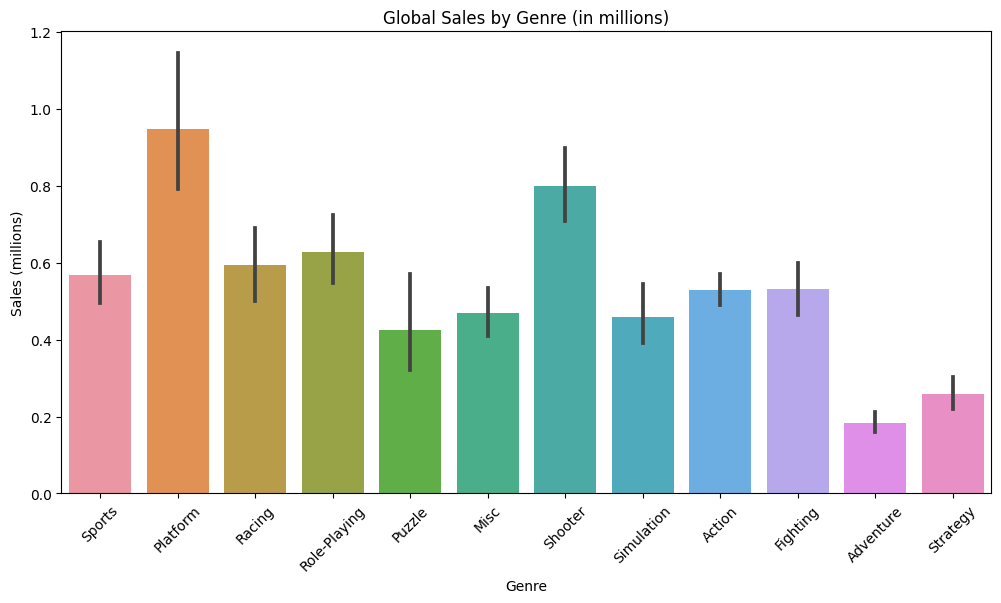

In [6]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['Genre'], y=data['Global_Sales'])
plt.title('Global Sales by Genre (in millions)')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.show()

### **Visualization #2**

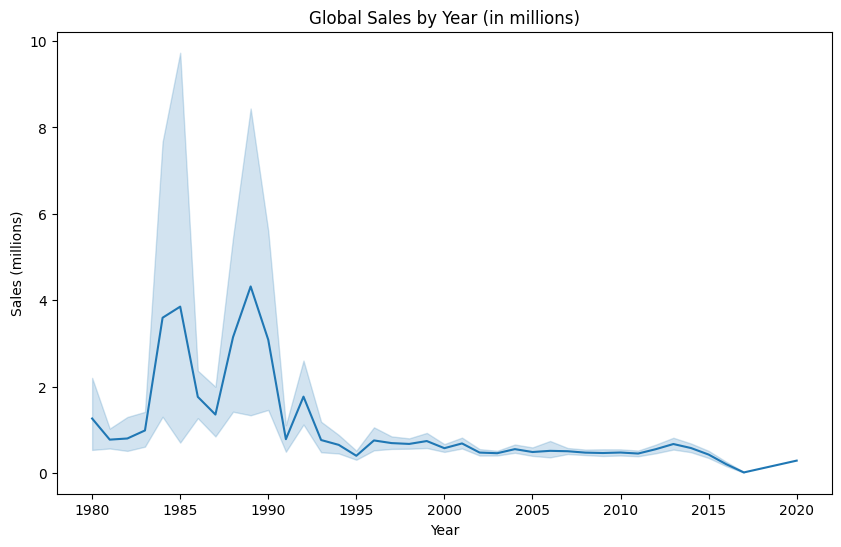

In [7]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data['Year'], y=data['Global_Sales'])
plt.title('Global Sales by Year (in millions)')
plt.ylabel('Sales (millions)')
plt.show()

### **Visualization #3**

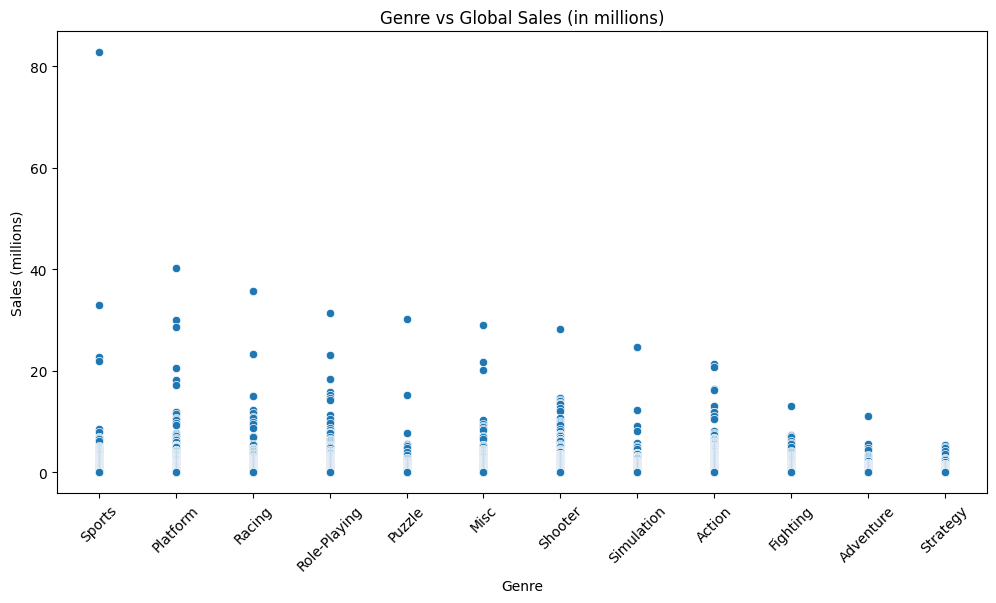

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['Genre'], y=data['Global_Sales'])
plt.title('Genre vs Global Sales (in millions)')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.show()

In [9]:
X = data[['Genre_Encoded', 'Year']]
y = data['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.275239370828089


### **Interactive visualization**

In [12]:
def plot_predictions(genre):
    historical_sales = data[data['Genre'] == genre]
    plt.plot(historical_sales['Year'], historical_sales['Global_Sales'], label='Historical Sales', marker='o')

    years = np.arange(2023, 2034)
    genre_encoded = encoder.transform([genre])
    predictions = [model.predict([[genre_encoded[0], year]])[0] for year in years]
    plt.plot(years, predictions, label='Predicted Sales', marker='o', linestyle='--')

    plt.title(f'Historical and Predicted Global Sales for {genre} (in millions)')
    plt.xlabel('Year')
    plt.ylabel('Global Sales (millions)')
    plt.legend()
    plt.grid(True)
    plt.show()

genres = data['Genre'].unique()
interact(plot_predictions, genre=genres)

interactive(children=(Dropdown(description='genre', options=('Sports', 'Platform', 'Racing', 'Role-Playing', '…

<function __main__.plot_predictions(genre)>